In [ ]:
# 기본 옵션
options(warn = -1)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# library 불러오기
library(stringr)
library(plotrix)
library(dplyr)

# 유흥업소 수에 따른 폭행 범죄와의 상관관계

### 데이터 출처 : <b>서울시 열린데이터 광장 - <a href="https://data.seoul.go.kr/dataList/316/S/2/datasetView.do">서울시 5대 범죄 발생현황 통계</a></b>

In [ ]:
# 데이터 불러오기
crime <- read.csv("Data/서울시 5대 범죄발생 현황.csv")
# 불필요한 행,열 제거
crime <- crime[-c(1:3),-c(2,4,5)]
# 열의 이름 변경
colnames(crime) <- c("발생년도","자치구별","살인발생","살인검거","강도발생","강도검거","강간/강제추행발생","강간/강제추행검거","절도발생","절도검거","폭력발생","폭력검거")
# 데이터 중 소계항목 제거
rownames(crime) <- c()
subset(crime,자치구별 == "소계")
crime <- crime[-c(26,52,78),]
rownames(crime) <- c()
# 결측치를 0으로 변경
for(i in 3:12) {
    cat(i,"번째 열('-' 확인) : ",nrow(subset(crime,crime[,i] == "-")),"\n")
    if(nrow(subset(crime,crime[,i] == "-")) > 0) {
        crime[,i] <- str_replace_all(crime[,i],"-","0")
        cat(i,"번째 열 변경","\n")
    }
}
# numeric type으로 변경
for(i in 3:12) {
    crime[,i] <- as.numeric(crime[,i])
}
# 결측치 확인
for(i in 3:12) {
    cat(i,"번째 :",sum(is.na(crime[,i])),"\n")
}
head(crime)
tail(crime)
str(crime)

In [425]:
# 연도별로 폭력 발생이 가장 높은 자치구
cat("연도별 폭력발생 상위 5개 자치구")
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,]

# 연도별로 폭력 발생이 가장 낮은 자치구
cat("연도별 폭력발생 하위 5개 자치구")
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,]

# 연도별 상위 TOP4에는 공통적으로 강남,영등포,송파,관악이 포함되어있었다!
crime_top4 <- rbind(
                    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:4,]
                    )
crime_top4$발생년도 <- as.numeric(crime_top4$발생년도)

# 또한 연도별 하위 TOP3에는 서대문구,도봉구,성동구는 포함되어있었다!
crime_bottom3 <- rbind(
                    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[23:25,]
                    )
crime_bottom3$발생년도 <- as.numeric(crime_bottom3$발생년도)

연도별 폭력발생 상위 5

,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,강남구,5,3,5,6,666,562,2970,1339,3658,3159
2,2019,영등포구,10,10,3,3,356,239,2409,1068,3042,2467
3,2019,송파구,7,8,10,10,273,230,2416,1016,2992,2535
4,2019,관악구,13,10,10,11,408,335,2223,1085,2674,2369
5,2019,서초구,5,5,7,5,616,412,2270,1118,2644,2210


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020,강남구,6,5,14,11,708,627,2951,1491,3677,3111
2,2020,영등포구,7,4,6,5,315,252,2188,953,2701,2157
3,2020,송파구,6,6,13,17,287,235,2429,1006,2675,2280
4,2020,관악구,12,12,3,3,403,351,2229,1137,2614,2355
5,2020,강서구,10,9,6,5,265,222,1689,1070,2445,2087


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021,강남구,12,11,25,23,578,454,2372,1160,3159,2749
2,2021,송파구,3,3,7,6,247,216,2024,995,2433,2046
3,2021,관악구,8,4,7,6,321,269,1860,929,2248,1926
4,2021,영등포구,8,8,11,11,279,196,1712,831,2169,1731
5,2021,강서구,9,7,3,3,246,188,1540,921,2098,1925


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,강남구,12,10,11,10,667,534,2495,1207,3762,3259
2,2022,송파구,2,2,5,6,290,220,2201,1033,2669,2148
3,2022,관악구,10,8,9,8,327,279,1966,1050,2567,2066
4,2022,영등포구,5,6,10,9,327,237,2062,953,2415,1981
5,2022,강서구,3,3,7,7,261,195,1991,1185,2401,2201


연도별 폭력발생 하위 5

,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2019,성북구,3,3,3,3,176,130,1082,731,1613,1456
22,2019,양천구,6,6,2,2,127,112,1477,634,1602,1370
23,2019,서대문구,2,1,5,5,175,154,1226,600,1535,1260
24,2019,성동구,6,5,9,10,133,96,970,511,1394,1216
25,2019,도봉구,1,1,5,5,90,83,790,394,1224,1014


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2020,금천구,4,4,7,6,117,93,999,553,1471,1310
22,2020,성북구,4,4,3,2,142,121,988,580,1430,1240
23,2020,서대문구,3,3,2,1,159,149,1077,524,1292,1029
24,2020,도봉구,0,0,2,2,82,87,861,379,1234,1022
25,2020,성동구,5,5,3,3,115,98,1016,565,1223,1103


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2021,용산구,3,2,1,1,141,103,945,484,1291,1069
22,2021,금천구,7,6,3,4,134,103,1013,520,1282,1108
23,2021,서대문구,3,3,2,2,137,120,1027,562,1109,907
24,2021,성동구,3,4,4,1,110,82,905,497,1090,926
25,2021,도봉구,2,2,2,1,72,64,772,376,1012,851


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2022,금천구,2,1,3,3,127,87,1118,662,1327,1134
22,2022,동작구,2,3,5,5,212,107,1195,588,1321,1038
23,2022,도봉구,3,3,0,0,70,54,969,546,1099,966
24,2022,서대문구,5,4,6,6,157,144,1114,565,1092,886
25,2022,성동구,2,2,2,2,125,97,979,538,1086,958


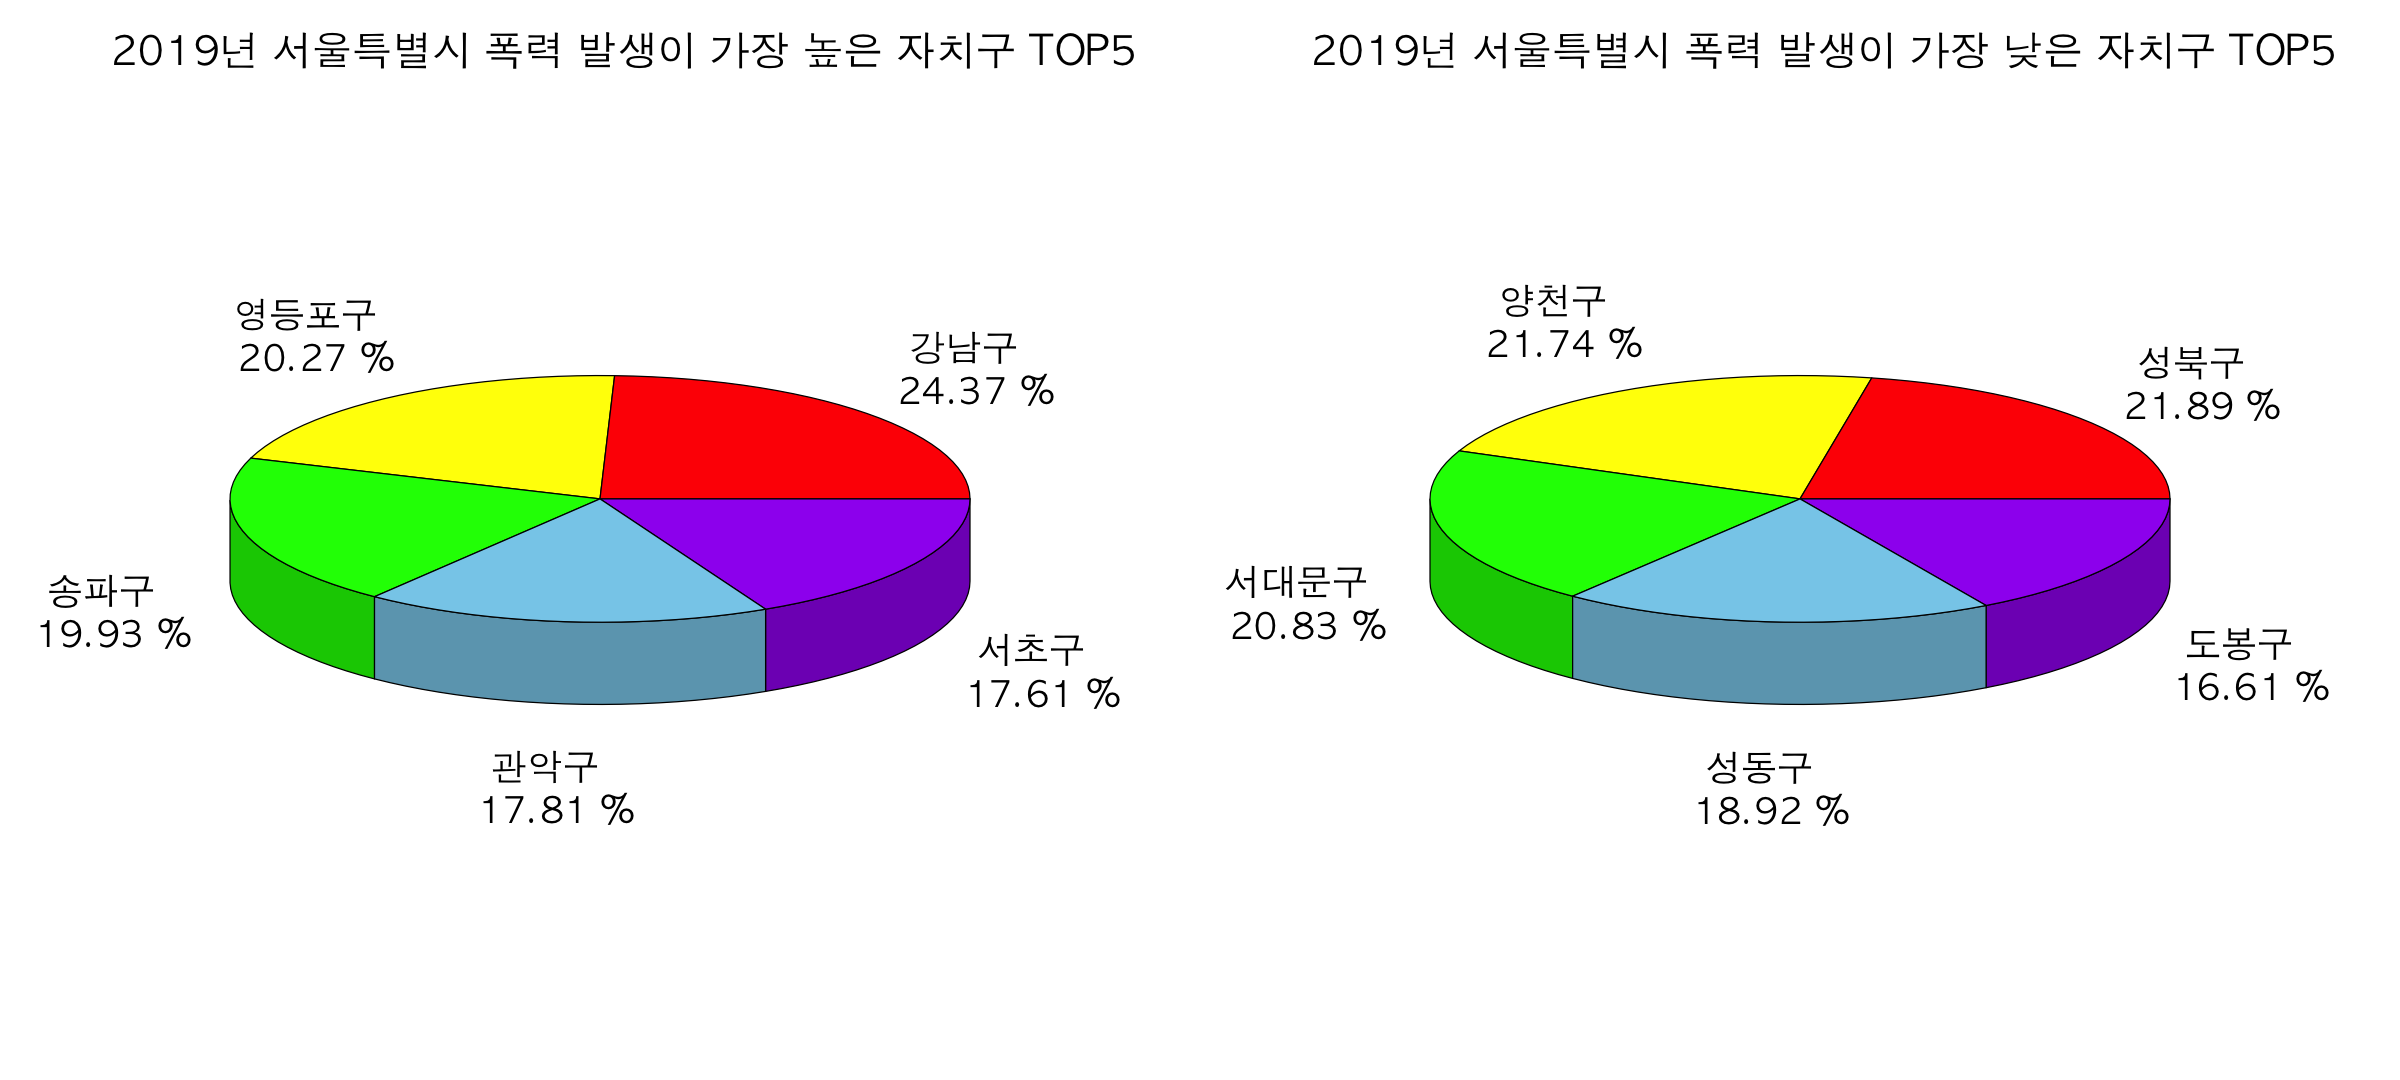

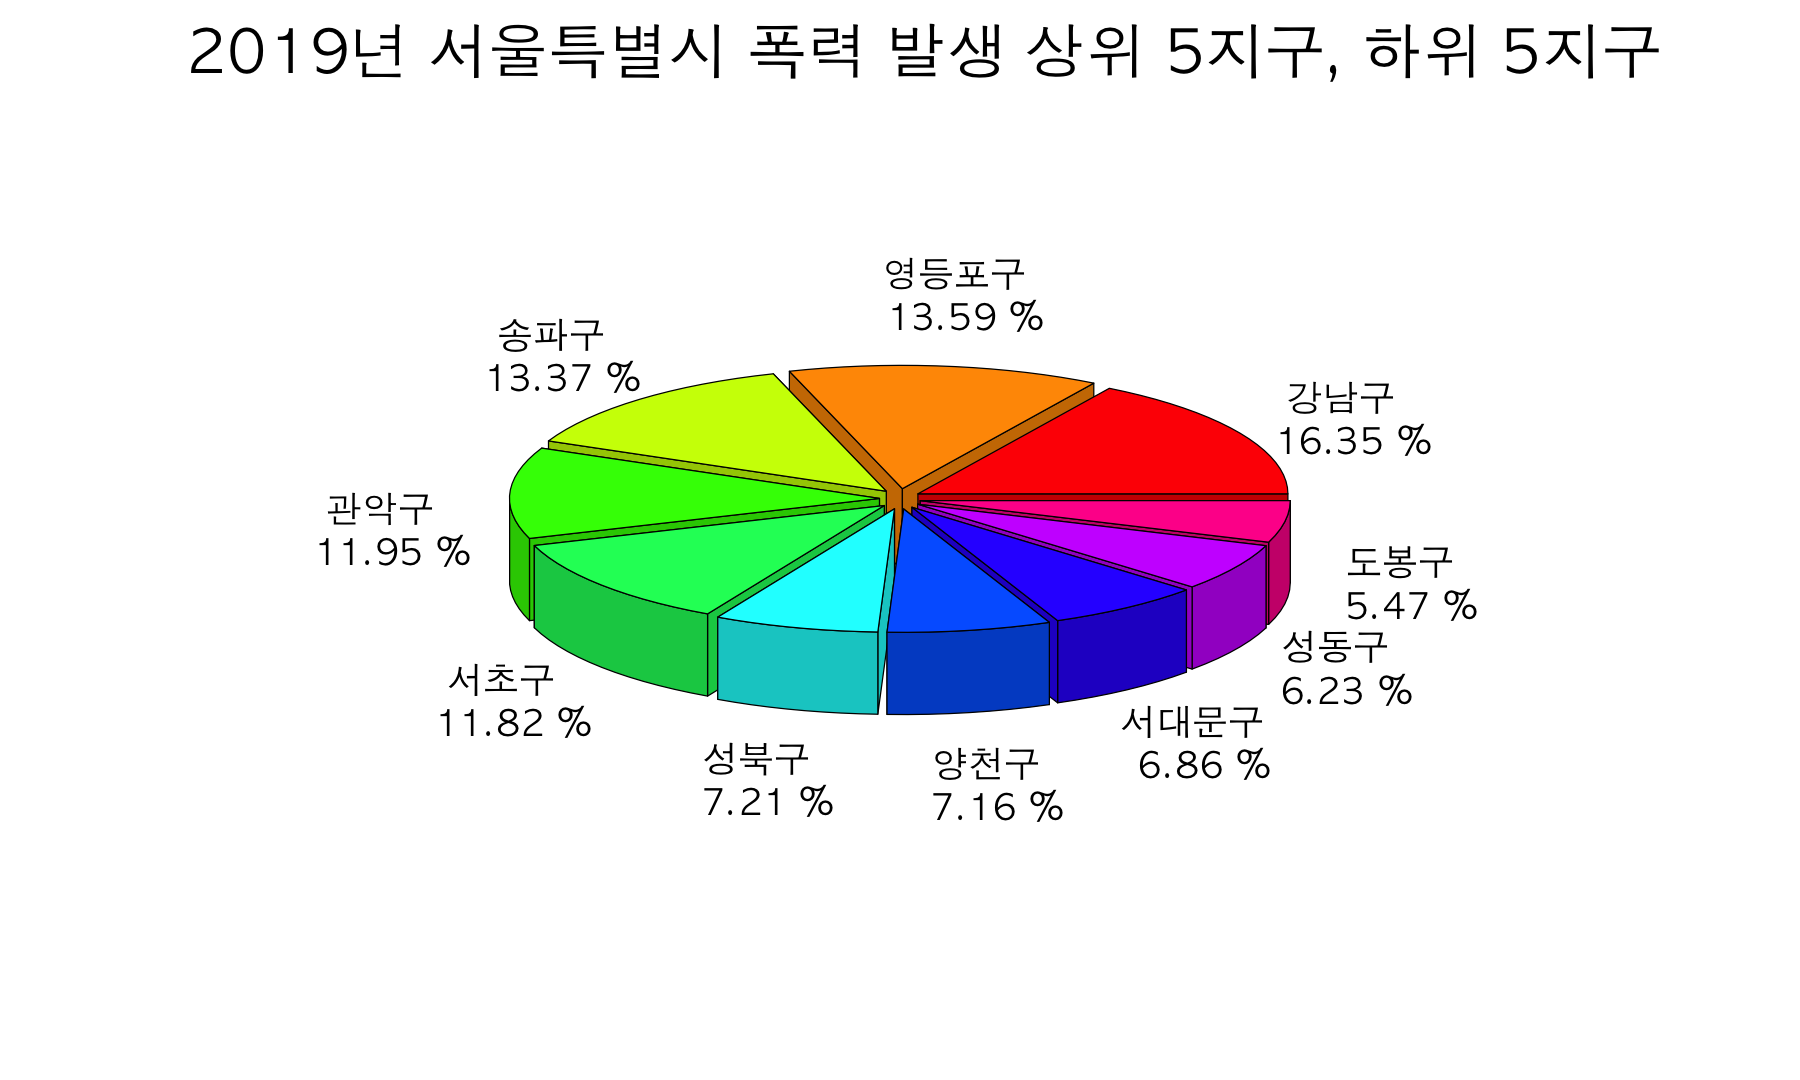

In [444]:
# 차트 크기 조정
options(repr.plot.width=20, repr.plot.height=9)

# 2019년 폭력 발생이 가장 높은 지역 TOP5
par(bg = 'white',family = "applegothic")
par(mfrow = c(1,2))

pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2019년 서울특별시 폭력 발생이 가장 높은 자치구 TOP5",
    cex.main = 2
)
# 결과 : 2019년에 가장 많이 발생한 5곳의 자치구들을 살펴본 결과, 강남구는 다른 자치구들에 비해 비율이 가장 높았다.

# 2019년 폭력 발생이 가장 낮은 지역 TOP5
pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2019년 서울특별시 폭력 발생이 가장 낮은 자치구 TOP5",
    cex.main = 2
)
# 결과 : 2019년에 가장 적게 발생한 5곳의 자치구들을 살펴본 결과 하위 5개 자치구들은 거의 다 비슷했지만, 도봉구는 근소한 차이로 비율이 가장 낮았다.
# 즉, 폭력 발생이 가장 적었다는 것이다.

par(mfrow = c(1,1))
options(repr.plot.width=15, repr.plot.height=9)
pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    explode = 0.05
)
title(
    main = "2019년 서울특별시 폭력 발생 상위 5지구, 하위 5지구",
    cex.main = 3
)

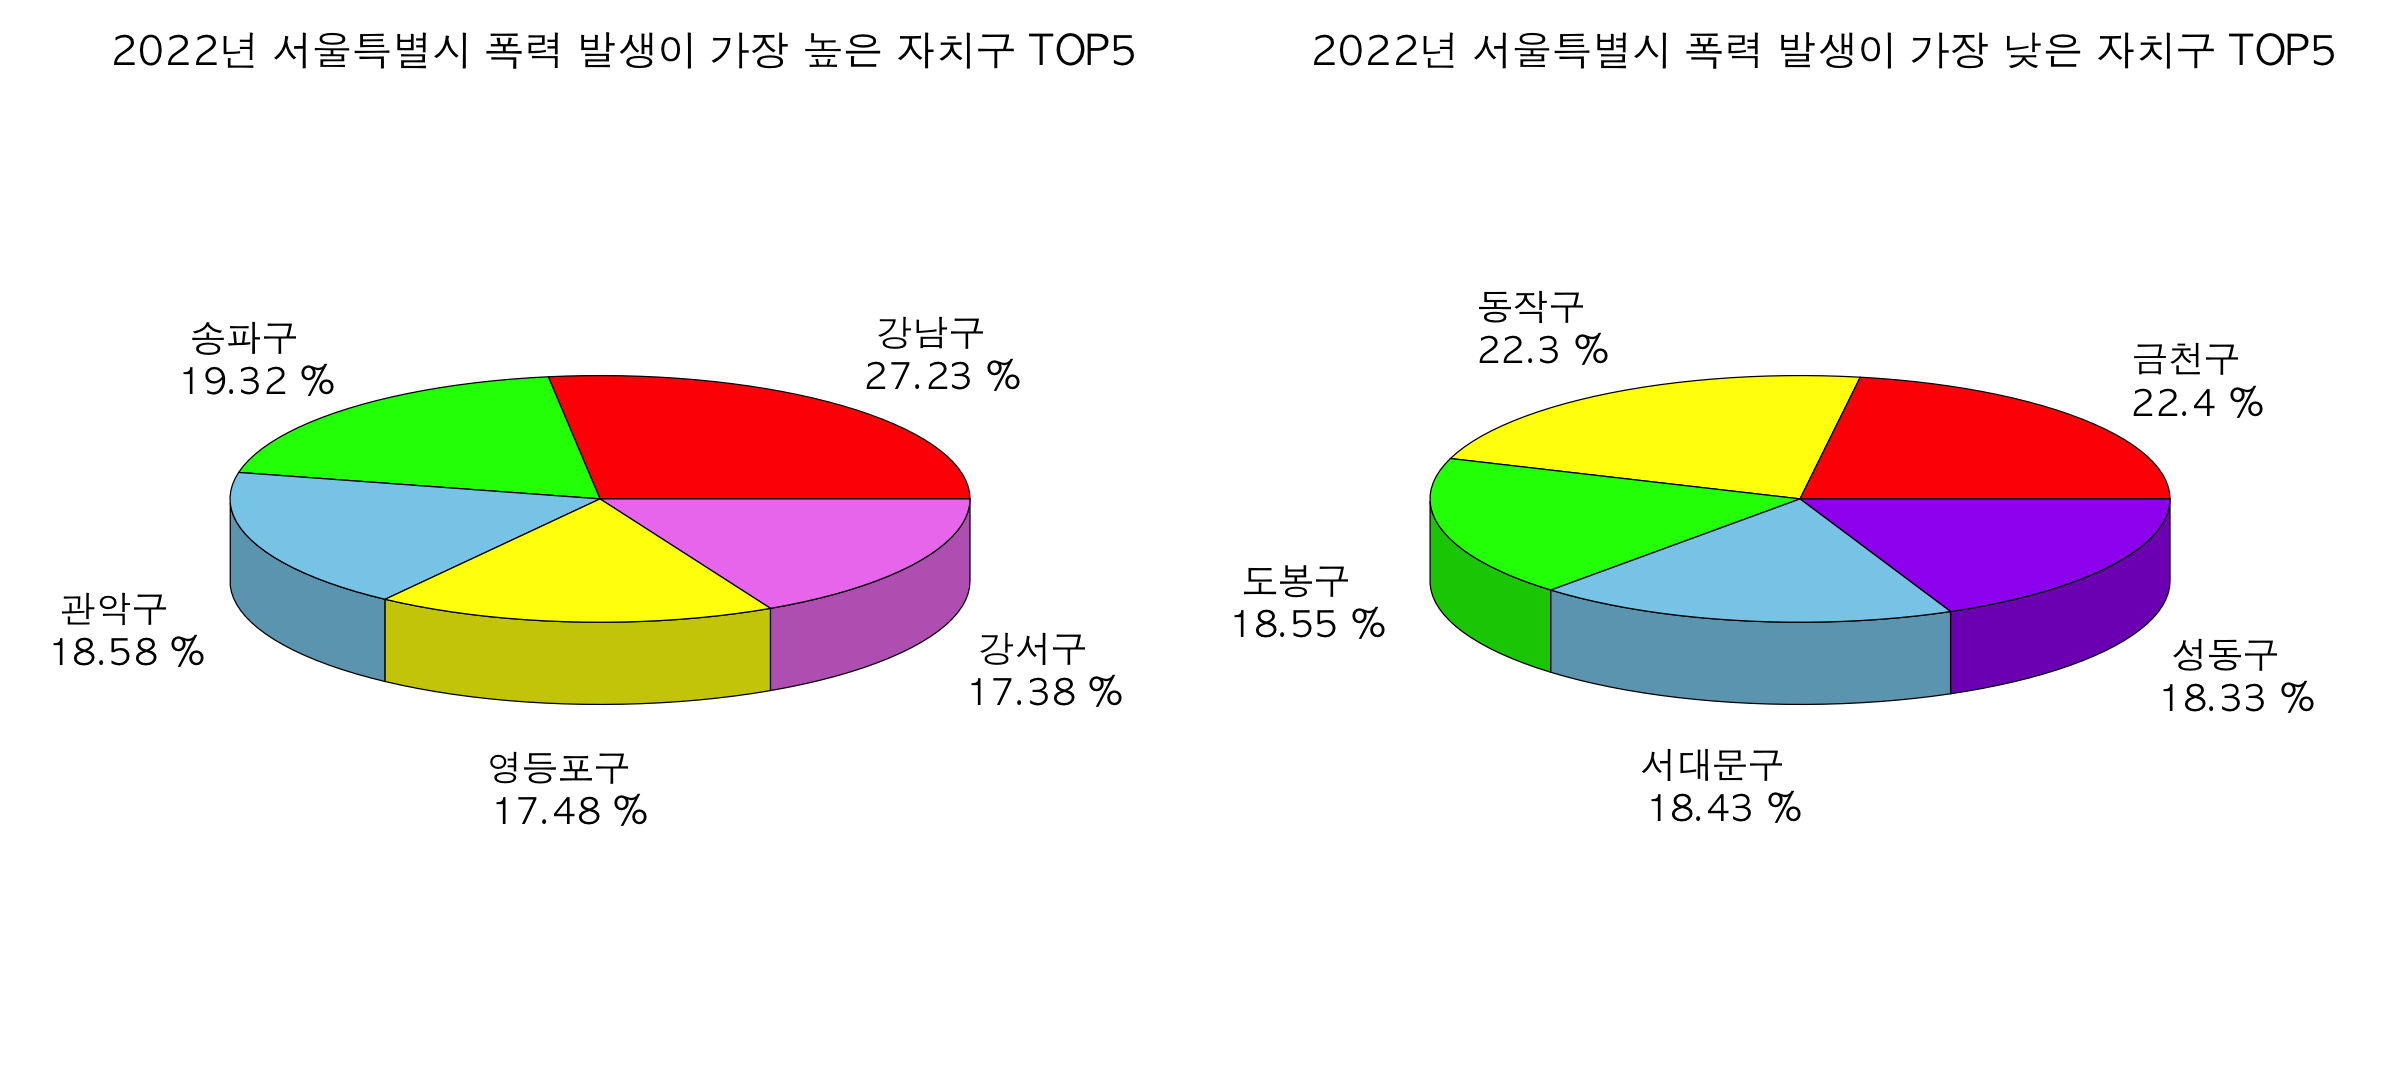

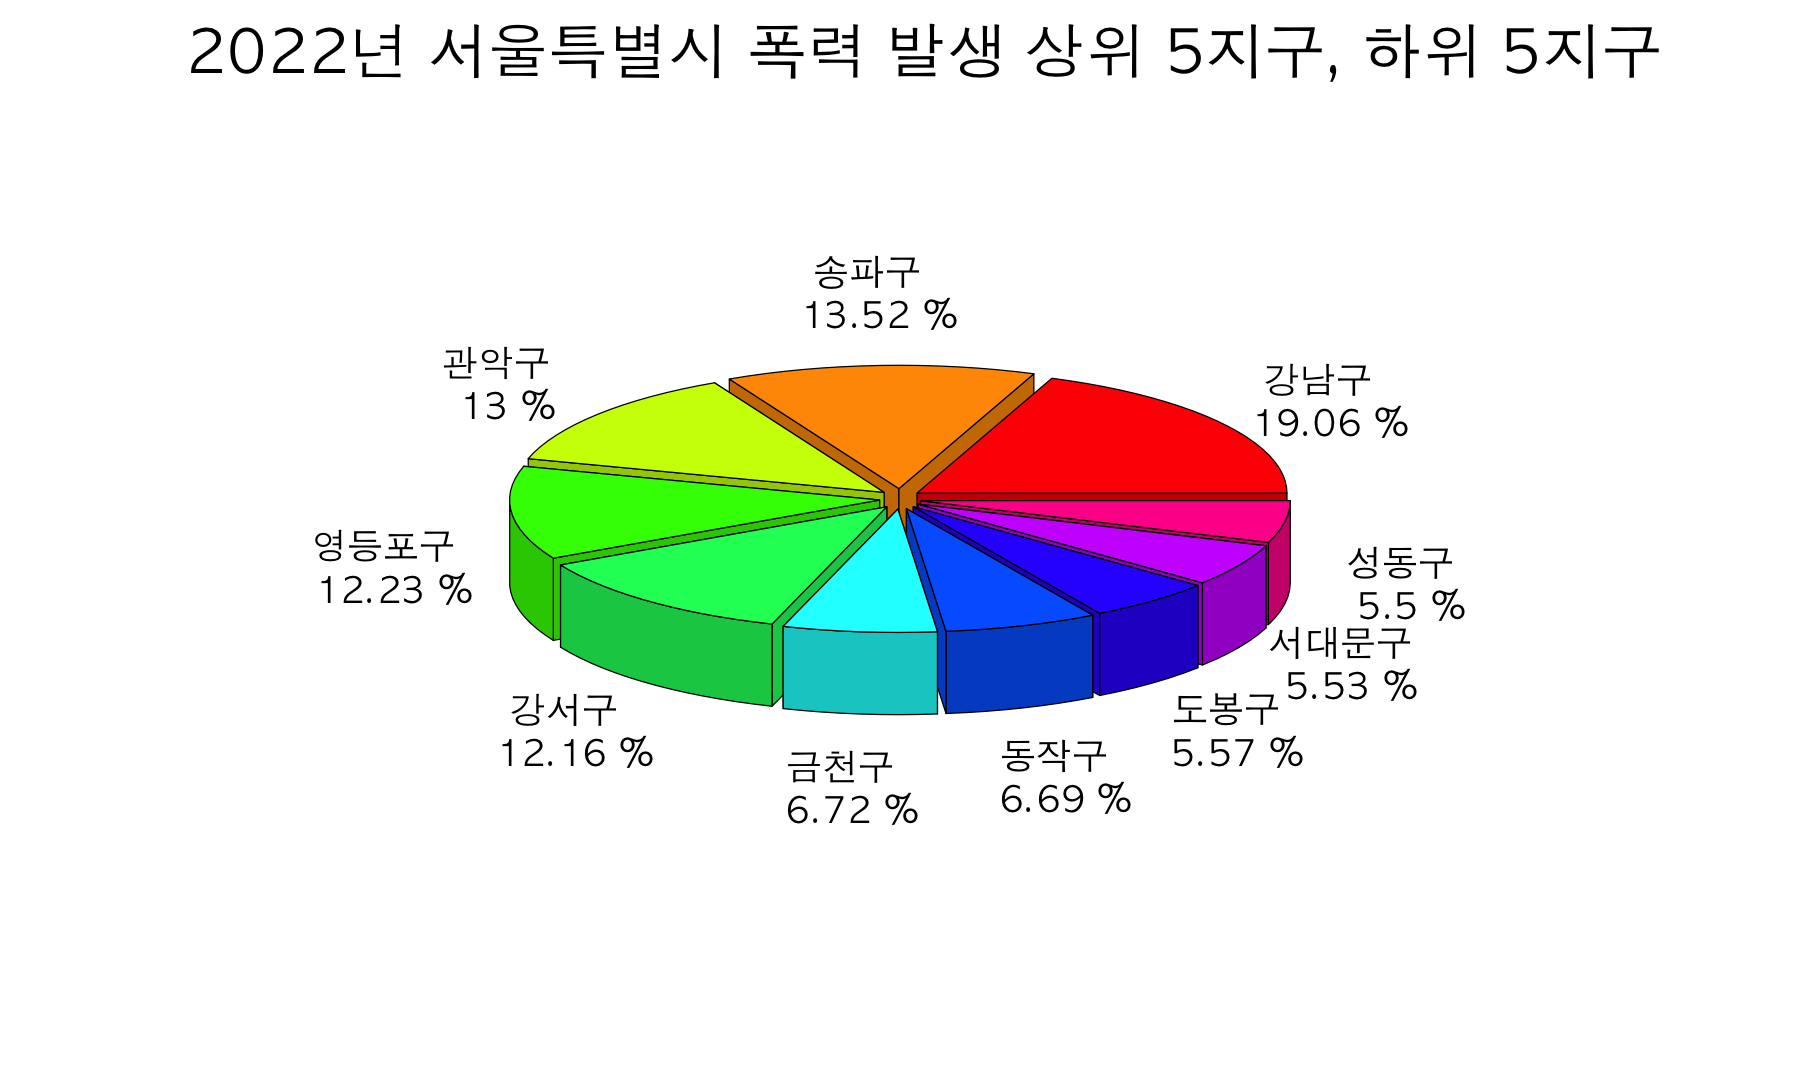

In [441]:
# 2022년 폭력 발생이 가장 높은 지역 TOP5
options(repr.plot.width=20, repr.plot.height=9)
par(bg = 'white',family = "applegothic")
par(mfrow = c(1,2))
pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','green','skyblue','yellow','violet')
)
title(
    main = "2022년 서울특별시 폭력 발생이 가장 높은 자치구 TOP5",
    cex.main = 2
)
# 결과 : 2019년과 같이 2022년에도 강남구는 상위 5개의 자치구 중에서도 가장 높은 비율을 차지하였다.

# 2022년 폭력 발생이 가장 낮은 지역 TOP5
pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2022년 서울특별시 폭력 발생이 가장 낮은 자치구 TOP5",
    cex.main = 2
)
# 결과 : 2019년에는 자치구별로 차이가 어느정도 있었다면, 2022년에는 하위 3개 자치구는 거의 동일한 비율을 기록하였다.

# 2022년 상위 5지역과 하위 5지역
options(repr.plot.width=15, repr.plot.height=9)
par(mfrow = c(1,1))
pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    explode = 0.05
)
title(
    main = "2022년 서울특별시 폭력 발생 상위 5지구, 하위 5지구",
    cex.main = 3
)
# 결과 : 상위 5개 자치구와 하위 5개 자치구를 같이 통계낸 차트를 보면 강남구와 성동구,서대문구,도봉구의 차이가 크다는 것을 알 수 있다.

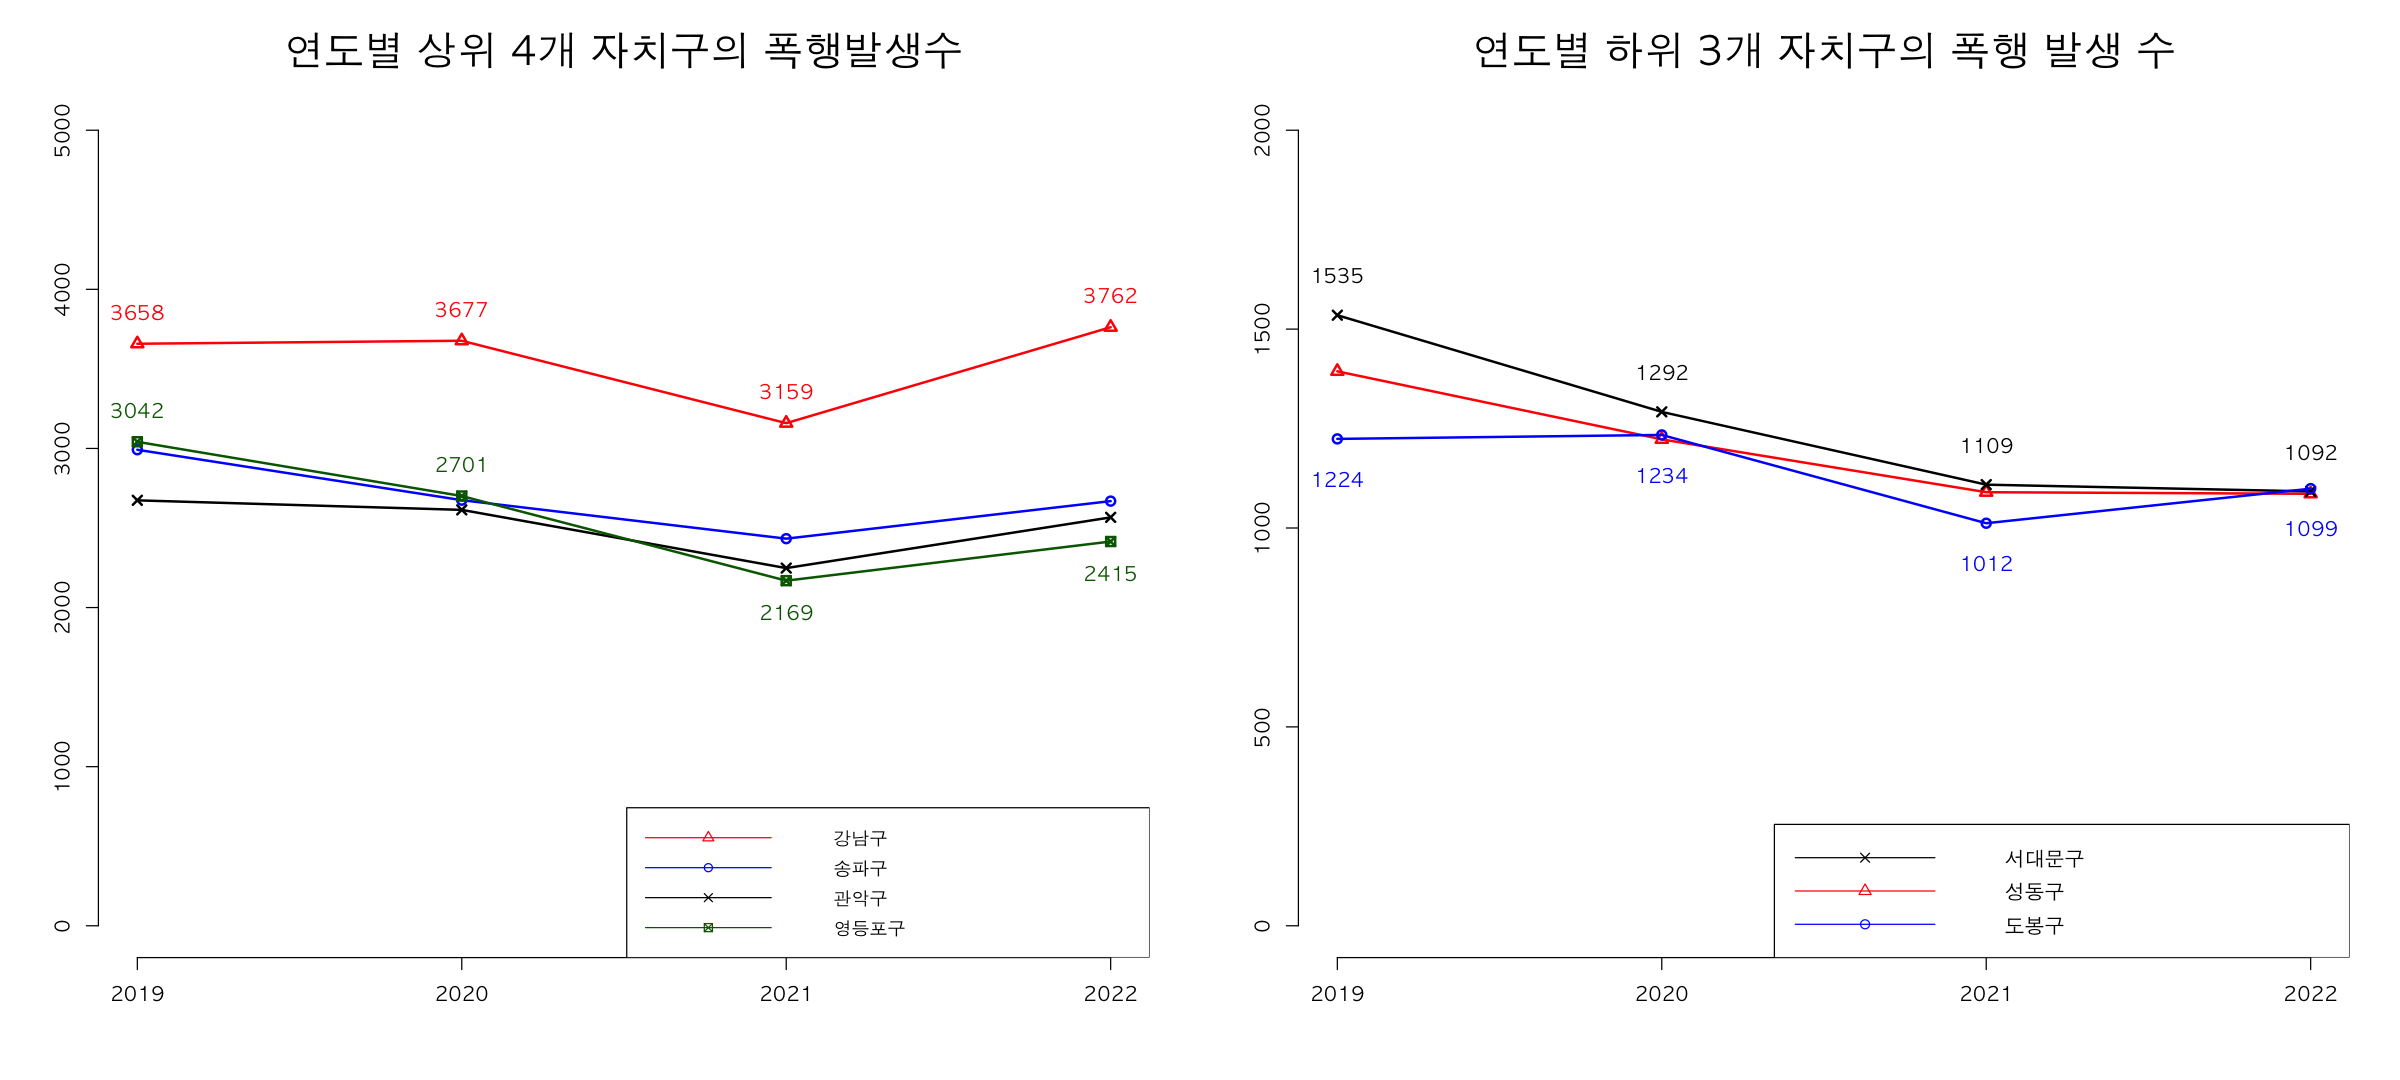

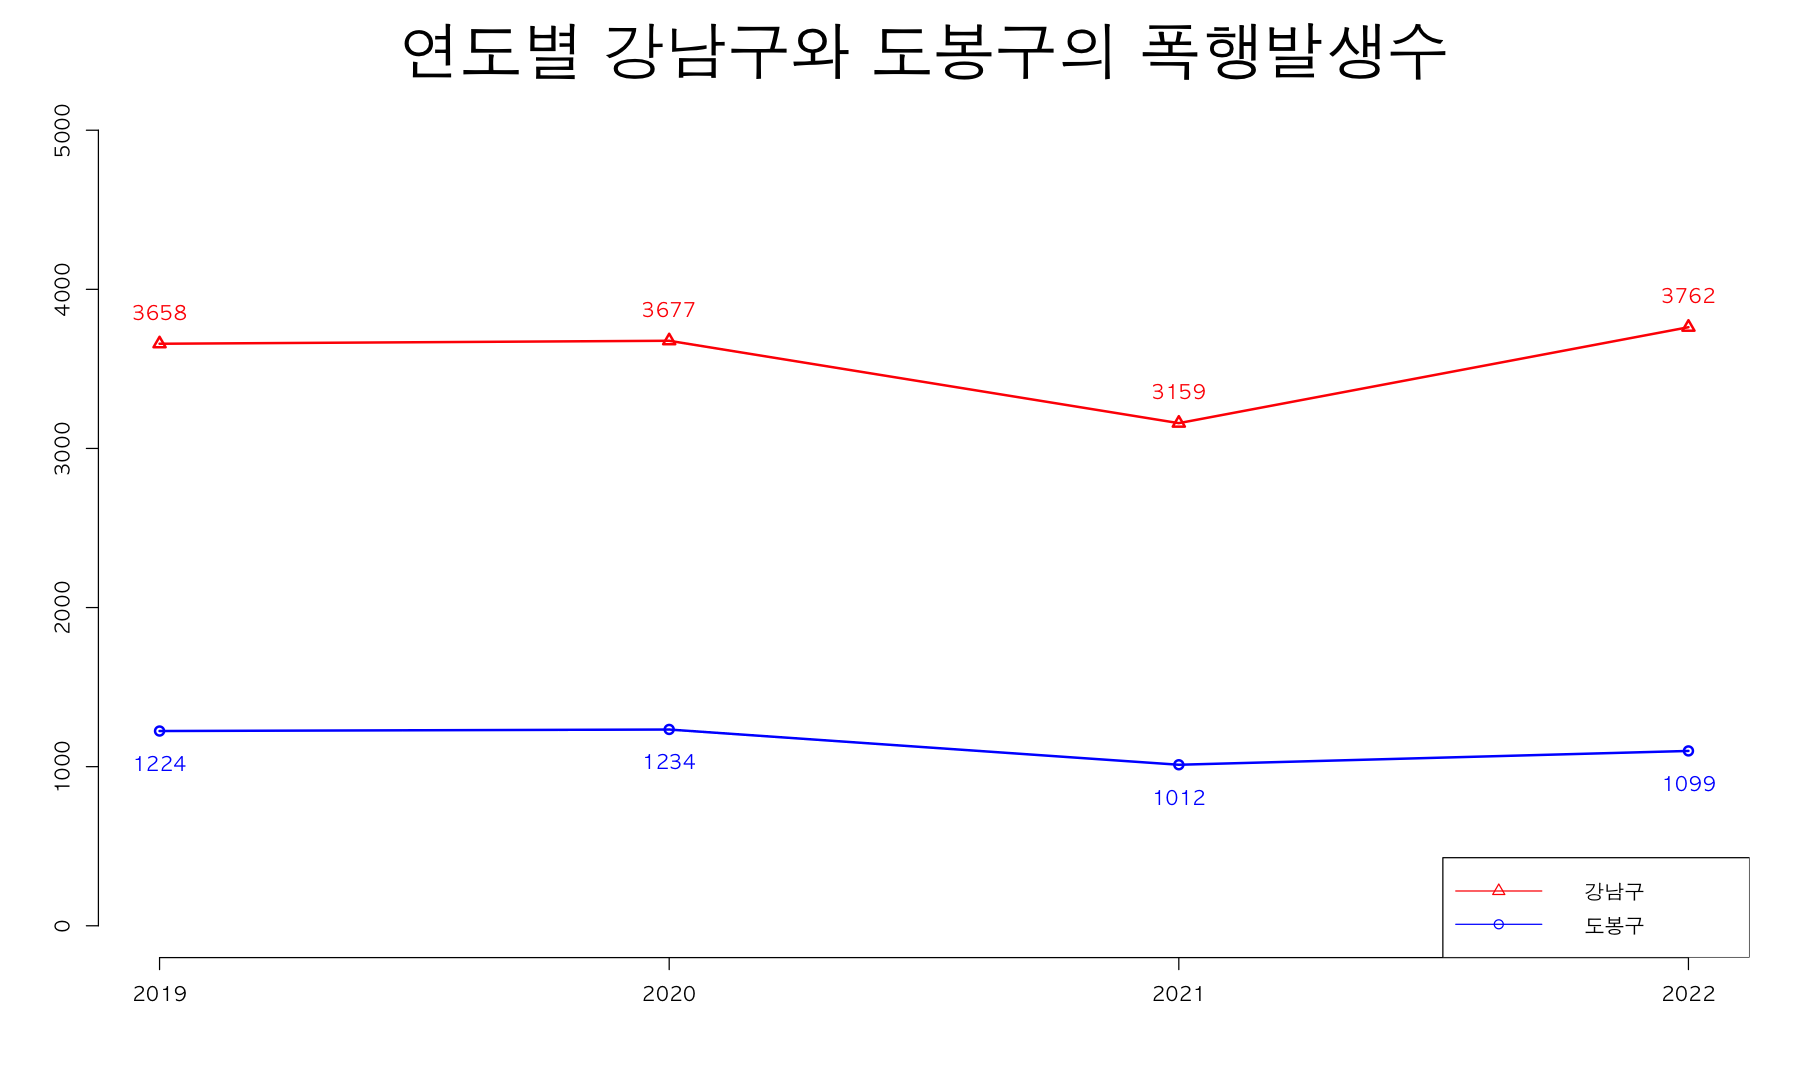

In [419]:
# 차트 크기 조정
options(repr.plot.width=20, repr.plot.height=9)

# 2019년 ~ 2022년 사이 폭력사건이 가장 많이 발생한 지역 TOP 5을 선정하였을때, 
# 강남구,송파구,관악구,영등포구 이 4개의 자치구들은 항상 포함되어 있었다.
# 이 4개의 자치구들을 꺾은선 그래프를 통해 비교.

# 연도별 상위 4개 자치구 
par(bg = 'white',family = "applegothic")
par(mfrow = c(1,2))
plot(
    subset(crime_top4,자치구별 == '강남구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    ylim = c(0,5000),
    pch = 2,
    ylab = '발생건수'
)

text(
    c(2019:2022),
    subset(crime_top4,자치구별 == '강남구')[,c(11)] + 200,
    subset(crime_top4,자치구별 == '강남구')[,c(11)],
    col = 'red'
)

text(
    c(2019:2022),
    c(subset(crime_top4,자치구별 == '영등포구')[,c(11)][1:2] + 200, subset(crime_top4,자치구별 == '영등포구')[,c(11)][3:4] - 200),
    subset(crime_top4,자치구별 == '영등포구')[,c(11)],
    col = 'darkgreen'
)

title(
    main = "연도별 상위 4개 자치구의 폭행발생수",
    cex.main = 2,
)
axis(1,at = 2019:2022,xlab='연도')
axis(2)

lines(
    subset(crime_top4,자치구별 == '송파구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)

lines(
    subset(crime_top4,자치구별 == '관악구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)

lines(
    subset(crime_top4,자치구별 == '영등포구')[,c(1,11)],
    type = 'o',
    col = 'darkgreen',
    lwd = 2,
    pch = 7
)

legend(
    "bottomright",
    legend = c("강남구","송파구","관악구","영등포구"),
    lty = 1,
    col = c("red","blue","black","darkgreen"),
    pch = c(2,1,4,7),
    cex = 0.9
)

# -----------------------------------------------------------------------------

# 또한 하위 5개 자치구를 살펴보았을때는 성동구,서대문구,도봉구는 항상 포함되어있었다.
par(bg = 'white',family = "applegothic")
plot(
    subset(crime_bottom3,자치구별 == '성동구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    pch = 2,
    ylim = c(0,2000)
)

title(
    main = "연도별 하위 3개 자치구의 폭행 발생 수",
    cex.main = 2
)

axis(1,at = 2019:2022)
axis(2)


lines(
    subset(crime_bottom3,자치구별 == '서대문구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)] + 100,
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)],
    col = 'BLACK'
)

lines(
    subset(crime_bottom3,자치구별 == '도봉구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)][1:4] - 100,
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)],
    col = 'BLUE'
)

legend(
    "bottomright",
    legend = c("서대문구","성동구","도봉구"),
    lty = 1,
    col = c("black","red","blue"),
    pch = c(4,2,1)
)

# -----------------------------------------------------------------------------

# 폭력 발생이 가장 많았던 강남구와 가장 적었던 도봉구와의 꺾은선 그래프를 통한 비교
options(repr.plot.width=15, repr.plot.height=9)
par(mfrow = c(1,1))
plot(
    subset(crime_top4,자치구별 == '강남구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    ylim = c(0,5000),
    pch = 2,
    xlab = "연도",
    ylab = "발생건수"
)
text(
    c(2019:2022),
    subset(crime_top4,자치구별 == '강남구')[,c(11)] + 200,
    subset(crime_top4,자치구별 == '강남구')[,c(11)],
    col = 'red'
)

title(
    main = "연도별 강남구와 도봉구의 폭행발생수",
    cex.main = 3.1,
)
axis(1,at = 2019:2022)
axis(2)

lines(
    subset(crime_bottom3,자치구별 == '도봉구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)][1:4] - 200,
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)],
    col = 'BLUE'
)
legend(
    "bottomright",
    legend = c("강남구","도봉구"),
    pch = c(2,1),
    lty = 1,
    col = c('red','blue')
)

<b><결과></b><br>

4개년을 비교하였을때, 폭력 발생 상위 4개 자치구에서 강남구는 항상 1등에 위치하였다.<br>
다른 3개의 자치구들은 서로 차이가 크지 않지만 강남구는 다른지역들과 차이가 컸다.

그에 비해 폭력 발생 하위 3개 자치구에서는 2019년에는 자치구들끼리 차이가 존재했지만, 시간이 흘러갈수록 그 차이가 미미해졌다.

가장 높은 강남구와 가장 낮았던 도봉구와의 폭행발생수를 비교해보니 연도별로 대략 3배정도 차이가 발생하였다.

## 2019 ~ 2022 강남과 도봉에서 영업중이였던 유흥주점의 수
### 조건
1. 현재 영업중이면서 2018-12-31 이전에 인허가를 받았어야함.
2. 현재 폐업이라면, 2020-01-01 이후 폐업한 유흥주점.

### 데이터 출처 : 서울시 열린데이터 광장 - <a href=https://data.seoul.go.kr/dataList/OA-18574/S/1/datasetView.do>서울시 강남구 유흥주점영업 인허가 정보</a><br>
### 데이터 출처 : 서울시 열린데이터 광장 - <a href=https://data.seoul.go.kr/dataList/OA-18561/S/1/datasetView.do>서울시 도봉구 유흥주점영업 인허가 정보</a><br>

In [206]:
# 파일 불러오기
store_강남 <- read.csv("Data/서울 강남 유흥주점.csv",fileEncoding = "EUC-KR")

# 삭제 컬럼 번지 : 1,2, 4,5,6,7,  10,11,12,13,14,15,  17,18,  21,22,  24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
# 남은 컬럼 번지 : 3,8,9,16,19,20,23
store_강남 <- store_강남[,-c(1:2,4:7,10:15,17:18,21:22,24:44)]

# 인허가일자,폐업일자,최종수정일자 포맷 변경(YYYYMMDD)
store_강남$인허가일자 <- str_replace_all(store_강남$인허가일자,"-","")
store_강남$폐업일자 <- str_replace_all(store_강남$폐업일자,"-","")
store_강남$최종수정일자 <- str_replace_all(store_강남$최종수정일자,"-","")

# 최종수정일자 시,분,초 제외
store_강남$최종수정일자 <- substr(store_강남$최종수정일자,1,10)

In [209]:
store_도봉 <- read.csv("Data/서울 도봉 유흥주점.csv",fileEncoding = "EUC-KR")

# 삭제 컬럼 번지 : 1,2, 4,5,6,7,  10,11,12,13,14,15,  17,18,  21,22,  24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
# 남은 컬럼 번지 : 3,8,9,16,19,20,23
store_도봉 <- store_도봉[,-c(1:2,4:7,10:15,17:18,21:22,24:44)]

# 인허가일자,폐업일자,최종수정일자 포맷 변경(YYYYMMDD)
store_도봉$인허가일자 <- str_replace_all(store_도봉$인허가일자,"-","")
store_도봉$폐업일자 <- str_replace_all(store_도봉$폐업일자,"-","")
store_도봉$최종수정일자 <- str_replace_all(store_도봉$최종수정일자,"-","")

# 최종수정일자 시,분,초 제외
store_도봉$최종수정일자 <- substr(store_도봉$최종수정일자,1,10)

### 조건
- 2019
    1. 현재 영업중이면서 2018-12-31 이전에 인허가를 받았어야함.
    2. 현재 폐업이라면, 2020-01-01 이후 폐업한 유흥주점.

- 2020,2021,2022 또한 위와 같은 방법으로 구함.

In [ ]:
# 강남구 2019 ~ 2022
# 1. 현재 영업중이면서, 2018-12-31 이전에 인허가를 받은 곳 : 140
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20181231)
# 2. 현재 폐업이라면, 2020-01-01 이후에 폐업한 곳 : 70
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20200101)
# 따라서 2019-01-01 ~ 2019-12-31 사이에 영업중이였던 유흥주점 : 210

# 2020-01-01 ~ 2020-12-31 - 201곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20191231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20210101)

# 2021-01-01 ~ 2021-12-31 - 176곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20201231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20220101)

# 2022-01-01 ~ 2022-12-31 - 174곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20211231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20230101)

store_강남_년도별 <- data_frame('2019' = 210, '2020' = 201, '2021' = 176, '2022' = 174)

In [ ]:
# 도봉구 2019 ~ 2022
# 1. 현재 영업중이면서, 2018-12-31 이전에 인허가를 받은 곳
sum(subset(store_도봉,상세영업상태명 == "영업")$인허가일자 < 20181231)
# 2018-12-31 이전에 인허가를 받은 곳 : 19

# 2. 현재 폐업이라면, 2020-01-01 이후에 폐업한 곳
sum(subset(store_도봉,상세영업상태명 == "폐업")$폐업일자 >= 20200101)
# 2020-01-01 이후에 폐업한 곳 : 4

# 따라서 2019-01-01 ~ 2019-12-31 사이에 영업중이였던 유흥주점 : 210

# 2020-01-01 ~ 2020-12-31 - 23곳
sum(subset(store_도봉,상세영업상태명 == "영업")$인허가일자 < 20191231)
sum(subset(store_도봉,상세영업상태명 == "폐업")$폐업일자 >= 20210101)

# 2021-01-01 ~ 2021-12-31 - 21곳
sum(subset(store_도봉,상세영업상태명 == "영업")$인허가일자 < 20201231)
sum(subset(store_도봉,상세영업상태명 == "폐업")$폐업일자 >= 20220101)

# 2022-01-01 ~ 2022-12-31 - 21곳
sum(subset(store_도봉,상세영업상태명 == "영업")$인허가일자 < 20211231)
sum(subset(store_도봉,상세영업상태명 == "폐업")$폐업일자 >= 20230101)

store_도봉_년도별 <- data_frame('2019' = 23, '2020' = 23, '2021' = 21, '2022' = 21)

In [385]:
# y limit가 다르기에 두 그래프를 한곳에 모아두고 비교
store_강남및도봉 <- data.frame(
    연도 = c(2019,2020,2021,2022),
    강남구유흥주점수 = as.integer(store_강남_년도별),
    도봉구유흥주점수 = as.integer(store_도봉_년도별))

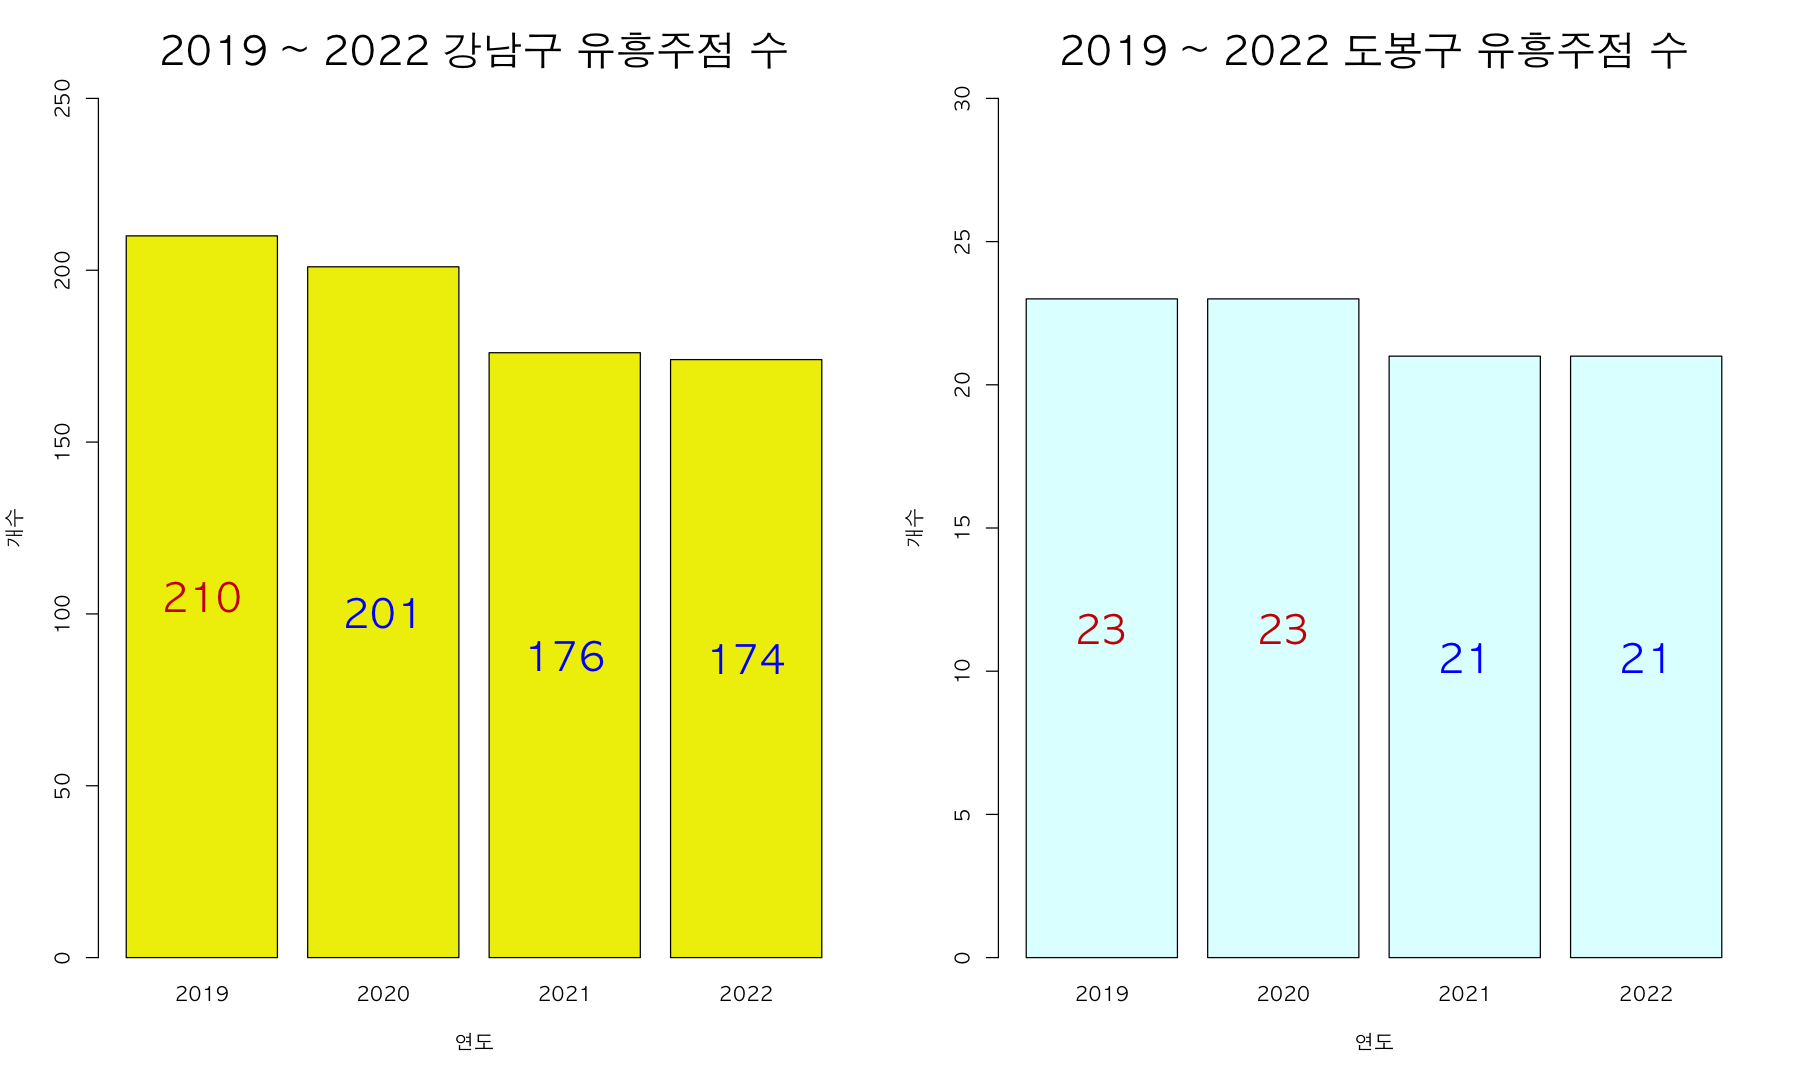

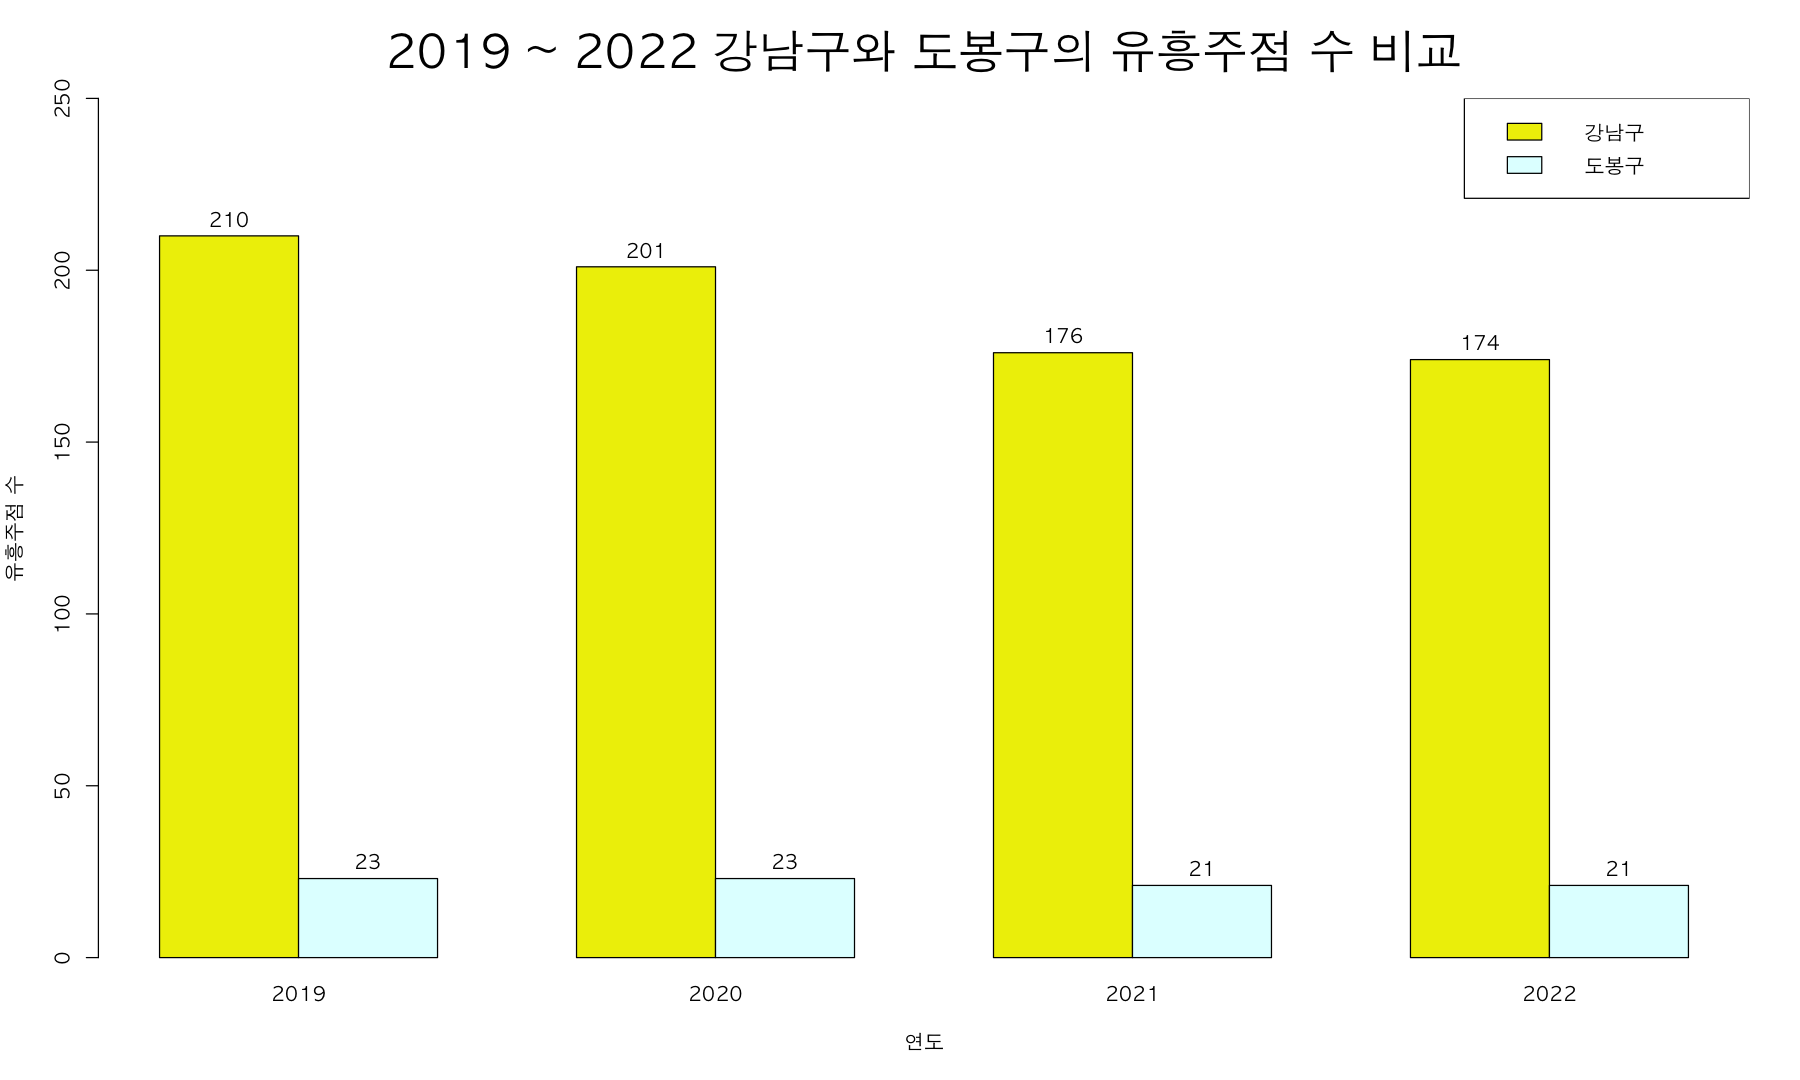

In [395]:
# 2019 ~ 2022 강남구 유흥주점 수
par(family = "AppleGothic",bg = "white")
par(mfrow = c(1,2))
barplot(
    as.integer(store_강남_년도별),
    names = c(2019:2022),
    ylim = c(0,250),
    col = 'yellow2',
    xlab = '연도',
    ylab = '개수'
)

title(
    main = "2019 ~ 2022 강남구 유흥주점 수",
    cex.main = 2
)
text(
    c(0.7,1.9,3.1,4.3,5.5),as.integer(store_강남_년도별) / 2,as.integer(store_강남_년도별),
    col = c('red3',rep('blue',1,3)),
    cex = 2
)

# 2019 ~ 2022 도봉구 유흥주점 수
barplot(
    as.integer(store_도봉_년도별),
    names = c(2019:2022),
    ylim = c(0,30),
    col = 'light cyan',
    xlab = '연도',
    ylab = '개수'
)
title(
    main = "2019 ~ 2022 도봉구 유흥주점 수",
    cex.main = 2
)
text(
    c(0.7,1.9,3.1,4.3,5.5),as.integer(store_도봉_년도별) / 2,as.integer(store_도봉_년도별),
    col = c('red3','red3','blue','blue'),
    cex = 2
)

# 강남구와 도봉구를 한번에 비교
par(mfrow = c(1,1))
barplot(
    t(as.matrix(store_강남및도봉))[2:3,],
    names = c('2019','2020','2021','2022'),
    col = c('yellow2','light cyan'),
    ylim = c(0,250),
    beside = T,
    xlab = '연도',
    ylab = '유흥주점 수'
)
title(
    main = '2019 ~ 2022 강남구와 도봉구의 유흥주점 수 비교',
    cex.main = 2.3
)

text(
    c(1.5, 4.5, 7.5, 10.5),
    t(as.matrix(store_강남및도봉))[2,] + 5,
    t(as.matrix(store_강남및도봉))[2,],
    col = 'black'
)
text(
    c(2.5, 5.5, 8.5, 11.5),
    t(as.matrix(store_강남및도봉))[3,] + 5,
    t(as.matrix(store_강남및도봉))[3,],
    col = 'black'
)

legend(
    "topright",
    legend = c('강남구','도봉구'),
    fill = c('yellow2','light cyan')
)

### 강남구와 도봉구의 유흥주점 수가 대략 8~9배정도 차이가 난다.

## 강남구와 도봉구의 폭행발생과 유흥주점의 수와의 상관계수
- 강남구 : 0.380
- 도봉구 : 0.942

In [ ]:
# 강남구의 폭력발생수와 유흥주점수의 cor 
cor(subset(crime,자치구별 == '강남구')$폭력발생, as.integer(store_강남_년도별))
cor(subset(crime,자치구별 == '도봉구')$폭력발생, as.integer(store_도봉_년도별))

## 강남구와 도봉구의 폭력발생의 변동계수
- 강남구 : 7.68%
- 도봉구 : 9.31%

In [ ]:
round(sd(subset(crime,자치구별 == '강남구')$폭력발생) / mean(subset(crime,자치구별 == '강남구')$폭력발생) * 100,2)
round(sd(subset(crime,자치구별 == '도봉구')$폭력발생) / mean(subset(crime,자치구별 == '도봉구')$폭력발생) * 100,2)

# 결론
- 가설 : <b>유흥주점수</b>가 많은 자치구는 <b>폭력발생</b>이 많을 것이다.
<br><br>

<h3>폭력 발생이 가장 높았던 강남구, 폭력 발생이 가장 낮았던 도봉구 이 2개의 자치구들을 유흥주점수와의 관계를 중점으로 비교하였다.</h3>

1. 강남구 2019 ~ 2022 폭력 발생 수<br><br>
우선 강남구를 확인하였을때, 2019 ~ 2022 폭력 발생수가 큰 변동이 일어나지 않았다.<br>
폭력 발생 상위 4개의 자치구를 꺾은선 그래프를 통해 비교한 부분을 보면, 2021년에는 다른 년도에 비해 그 수가 살짝 감소한 모습을 볼 수 있었는데, 2020년 3677 건에서 2021년 3159 건으로 대략 520여 건의 감소가 있었다.<br>
이러한 부분은 코로나19의 여파로 인해 사회적 거리두기의 영향이 있었던 것으로 보인다.<br>

<br>

2. 도봉구 2019 ~ 2022 폭력 발생 수<br><br>
도봉구는 2019 ~ 2022 폭력 발생수가 전체적으로 우하향을 보였다. <br>
하지만 강남구와 같이 코로나19의 영향으로 인해 2020년, 1234 건에서 2021년, 1012 건으로 대략 210여 건 정도 감소하였다.<br><br>

<h4>2022년에는 두 자치구 모두 폭력 발생 수가 증가한 모습을 보인다. 백신 보급으로 인한 사회적 거리두기 해제 및 시민들의 인식 변화가 원인이 된다고 추측된다.</h4>
<br>

3. 2019 ~ 2022 유흥주점 수<br><br>
유흥주점수 또한 폭력발생과 비슷한 양상을 보이는데,<br>
강남구의 경우 2020년 201개에서 2021년 176개로 17% 감소, 도봉구의 경우 2020년 23개에서 2021년 21개로 8% 감소는 하였지만, 강남구에 비해 차이가 미미하였다.
<br>
<br>

4. 폭력 발생과 유흥주점수와의 상관계수<br><br>
폭력 발생과 유흥주점수와의 상관계수를 살펴보면, 강남구는 0.38, 도봉구는 0.942가 도출되었다.<br>
두 결과를 놓고 보았을때 의문스러운 점은 강남구는 약한 상관관계지만, 도봉구는 강한 상관관계로 나타났다.<br><br>
이 두 개의 자치구는 4개년 사이 비슷한 추세의 폭력발생과 유흥주점수를 기록하였는데 한 쪽은 관계가 강하고, 한쪽은 관계가 약하다는 결론이 도출될 수 없다고 생각한다.

<br>

5. 마무리<br>
따라서 폭력 발생과 유흥주점의 수와는 직접적인 관계는 알 수 없다고 생각한다. 그 이유는 위에 서술하였듯이 2개의 자치구가 서로 다른 결과가 도출 되었다는 점이 되겠다.<br>
결국 폭력발생과 유흥주점의 수 2가지만으로는 불가능하며 폭력발생 증가의 요인을 알아보려면 유동인구나 폭력발생의 장소, 자치구들의 시가화면적이나 문화생활 등 다양한 요소와 함께 분석이 되어야 할 것이다.<br>